In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Duffing equation
def a(v, x, t, k, B):
    return B * np.cos(t) - k * v - x**3

k_arr = [0, 1]
B_arr = [1, 5, 12]
x0, v0 = 1, -1        # initial condition (t0 = 0 given)

# Euler-Richardson (ER) method
def ER(k, B, dt, N, phase_space=0):
    x, v = np.zeros(N), np.zeros(N)   # v as well for phase space diagram
    
    x[0], v[0] = x0, v0
    
    for n in range(N-1):
        a_n = a(v[n], x[n], n * dt, k, B)
        
        v_mid = v[n] + a_n * dt / 2
        x_mid = x[n] + v[n] * dt / 2
        a_mid = a(v_mid, x_mid, (n + 1/2) * dt, k, B)
        
        x[n+1] = x[n] + v_mid * dt
        v[n+1] = v[n] + a_mid * dt
        
    if phase_space == 1:
        plt.plot(x, v)
        plt.title('phase space')
        plt.show()
    
    return x

# Discrete Fourier transform (DFT)
def DFT(f, N):
    F = np.zeros(N)  # DFT of f
    
    for i in range(N):
        sum = 0
        for n in range(N):
            sum += f[n] * np.exp(-1j * 2 * np.pi * n * i / N)
        F[i] = abs(sum) / np.sqrt(N)
    
    return F

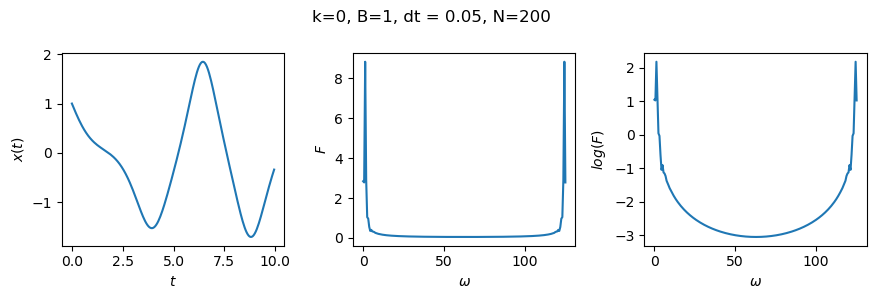

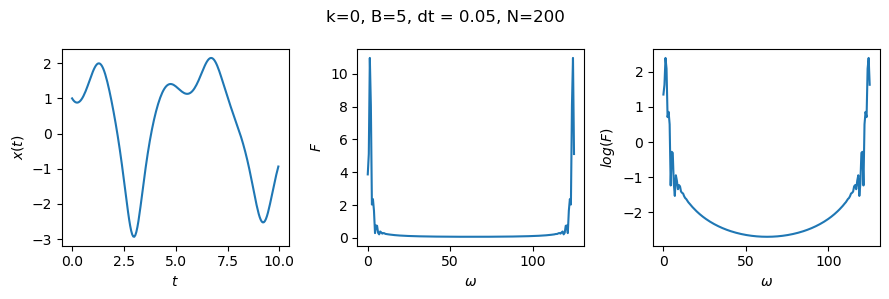

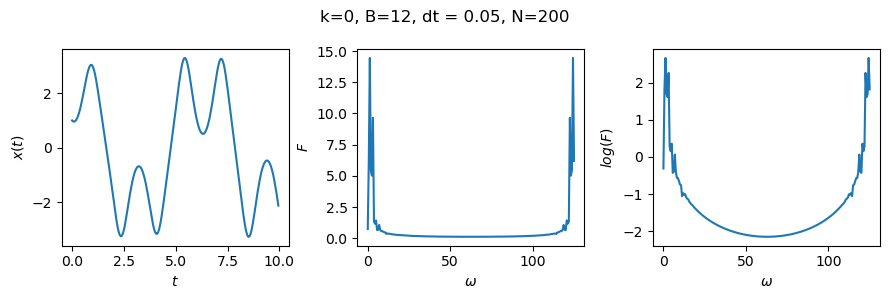

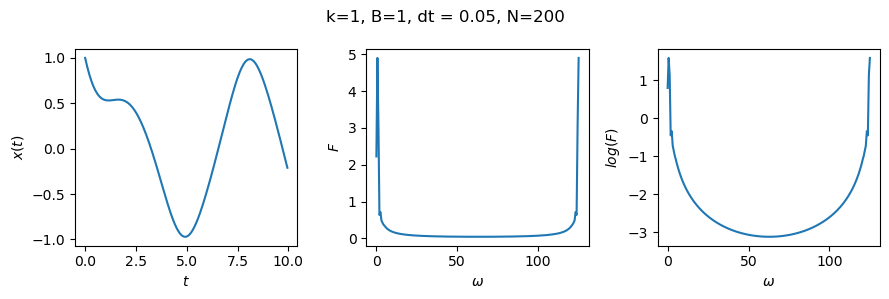

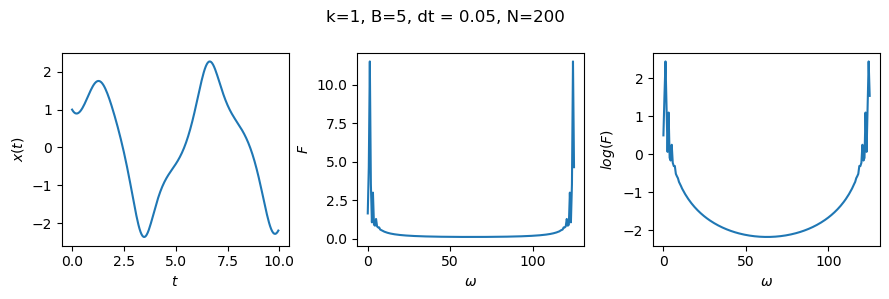

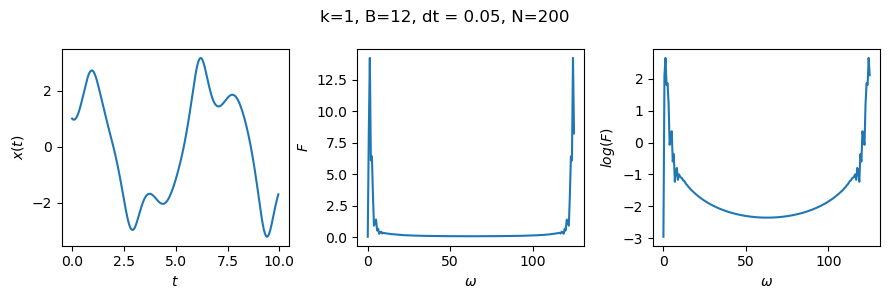

In [99]:
N = 200
dt = 0.05

for k in k_arr:
    for B in B_arr:
        f = ER(k, B, dt, N)
        F = DFT(f, N)
        
        t = np.arange(N) * dt
        w = np.arange(N) * (2 * np.pi) / (N * dt)
        
        fig, axs = plt.subplots(1, 3, figsize=(9,3), dpi=100)
        plt.suptitle('k={:}, B={:}, dt = {:}, N={:}'.format(k, B, dt, N))
        axs[0].plot(t, f)                   # trajectory x(t)
        axs[0].set_xlabel(r'$t$')
        axs[0].set_ylabel(r'$x(t)$')
        axs[1].plot(w, F)                   # linear spectral line
        axs[1].set_xlabel(r'$\omega$')
        axs[1].set_ylabel(r'$F$')
        axs[2].plot(w, np.log(F))           # semi-log spectral line
        axs[2].set_xlabel(r'$\omega$')
        axs[2].set_ylabel(r'$log(F)$')
        plt.tight_layout()
        plt.show()

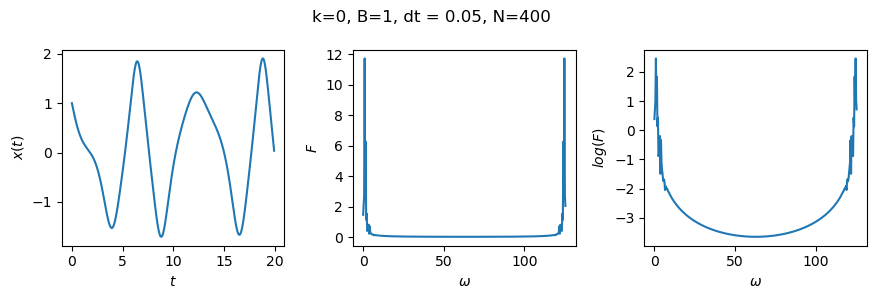

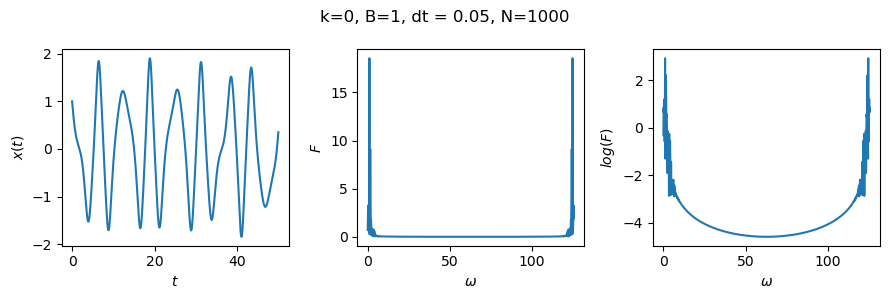

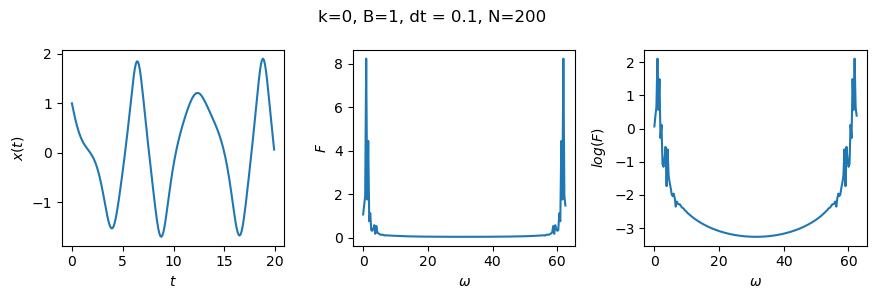

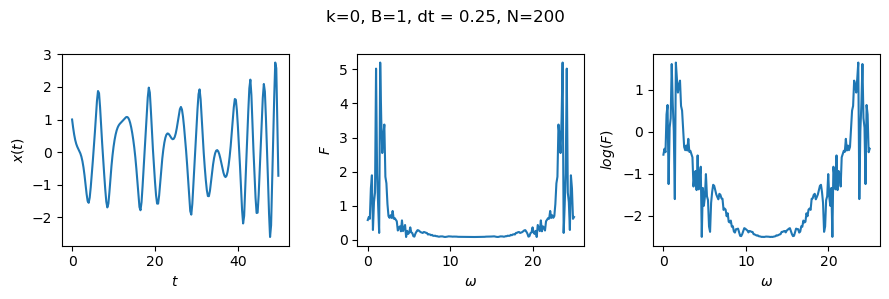

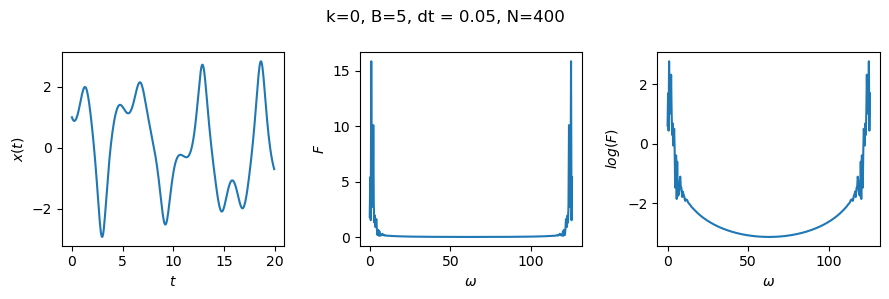

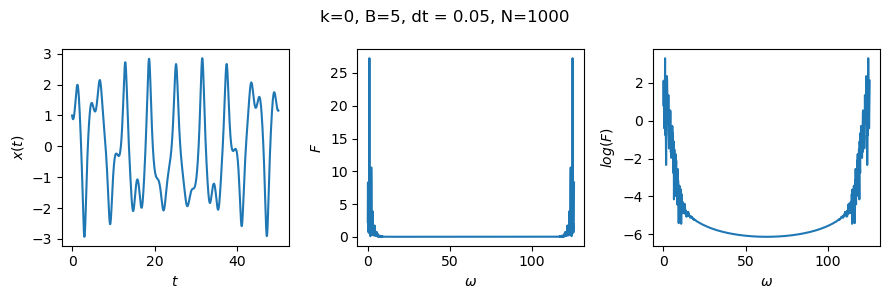

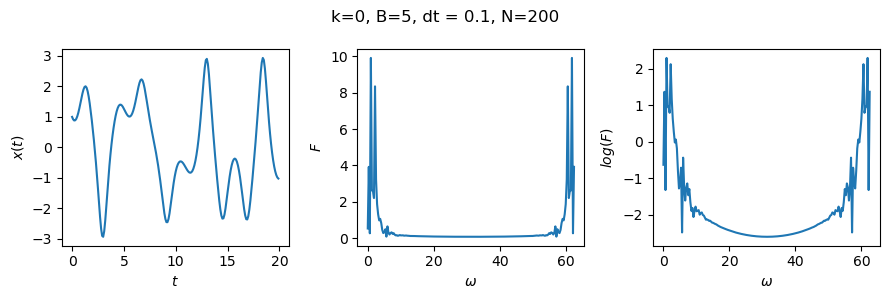

<ipython-input-98-22f7635f0f28>:3: RuntimeWarning: overflow encountered in double_scalars
  return B * np.cos(t) - k * v - x**3
<ipython-input-98-22f7635f0f28>:3: RuntimeWarning: invalid value encountered in double_scalars
  return B * np.cos(t) - k * v - x**3
<ipython-input-98-22f7635f0f28>:39: RuntimeWarning: invalid value encountered in multiply
  sum += f[n] * np.exp(-1j * 2 * np.pi * n * i / N)


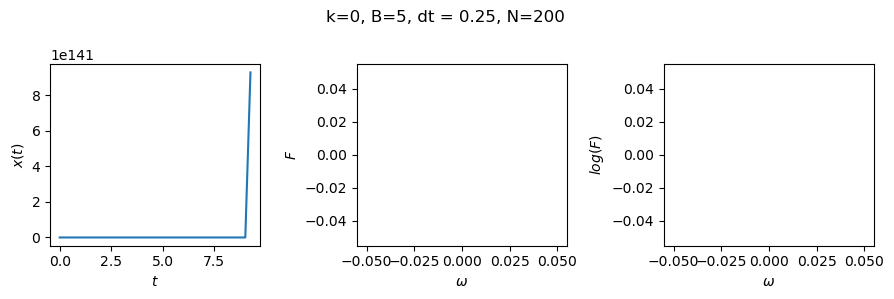

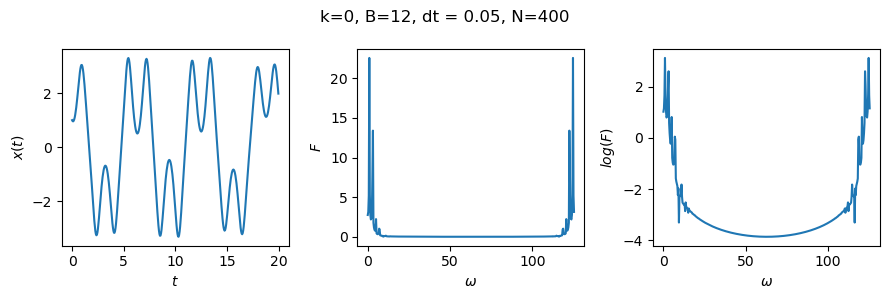

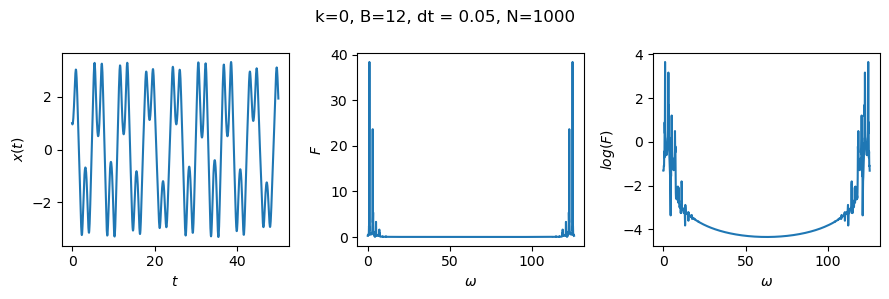

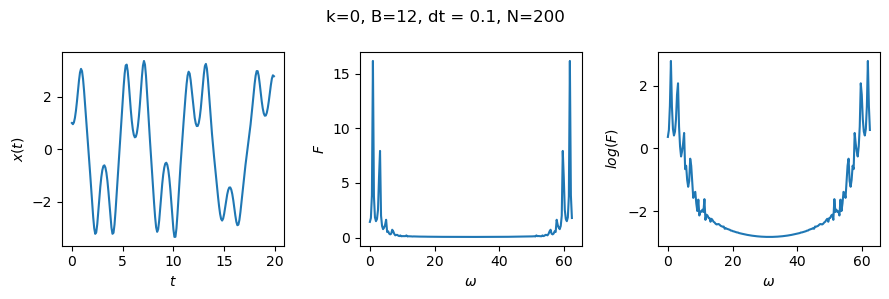

<ipython-input-98-22f7635f0f28>:3: RuntimeWarning: overflow encountered in double_scalars
  return B * np.cos(t) - k * v - x**3
<ipython-input-98-22f7635f0f28>:3: RuntimeWarning: invalid value encountered in double_scalars
  return B * np.cos(t) - k * v - x**3
<ipython-input-98-22f7635f0f28>:39: RuntimeWarning: invalid value encountered in multiply
  sum += f[n] * np.exp(-1j * 2 * np.pi * n * i / N)


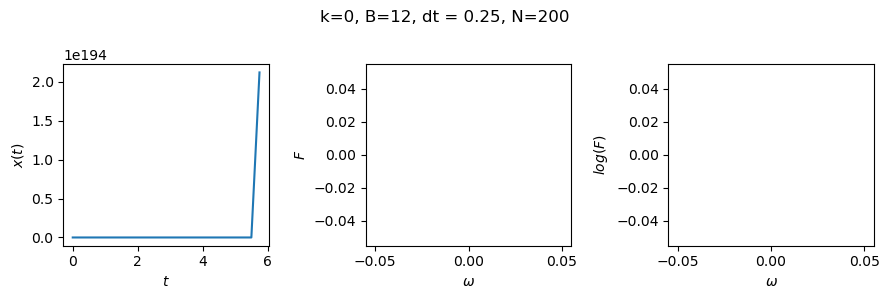

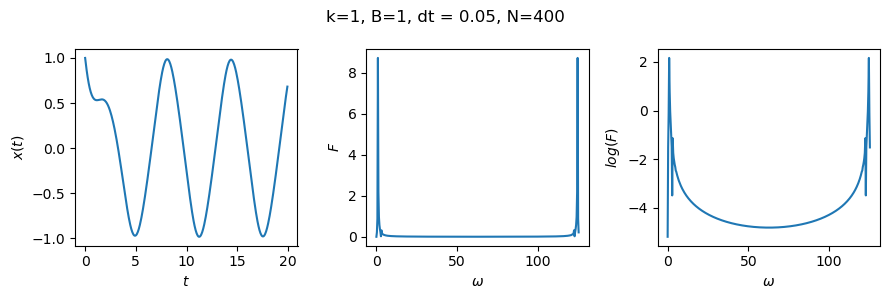

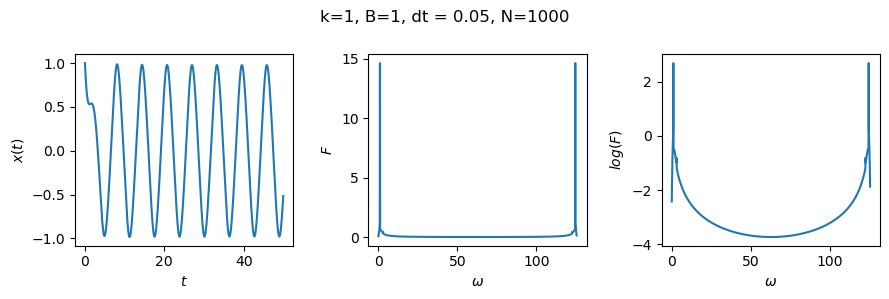

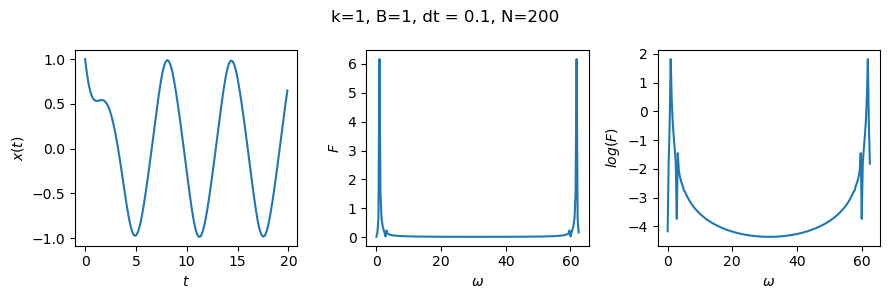

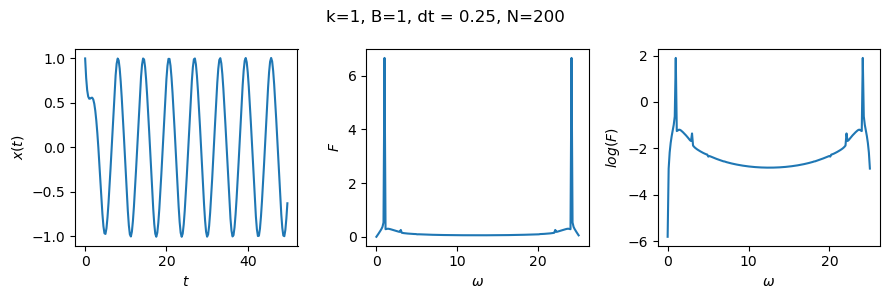

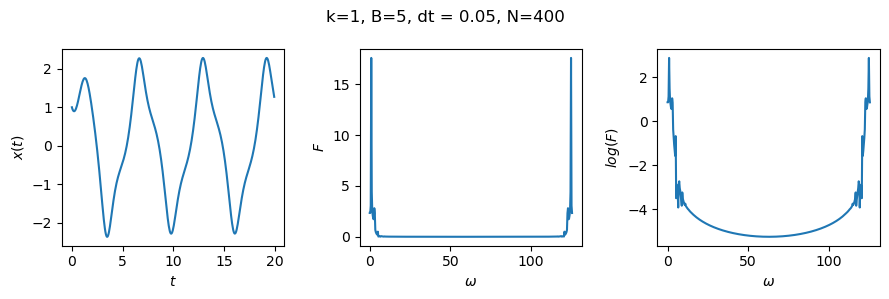

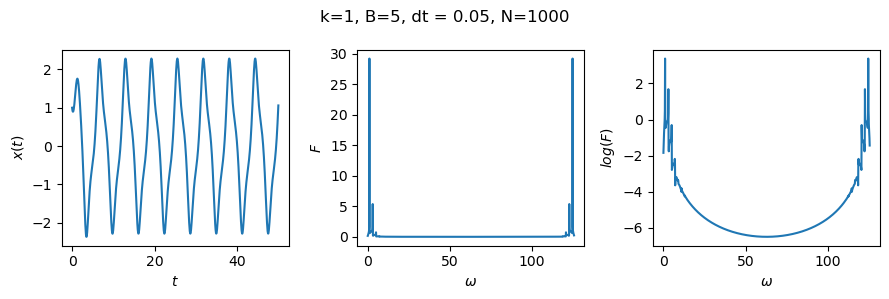

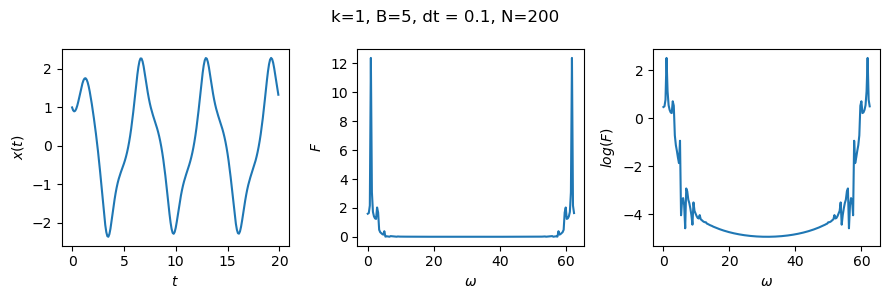

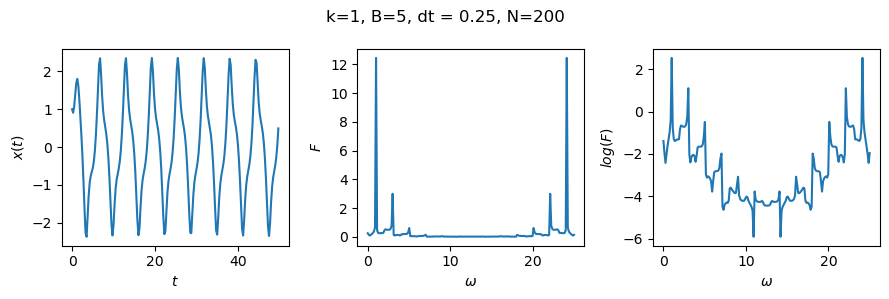

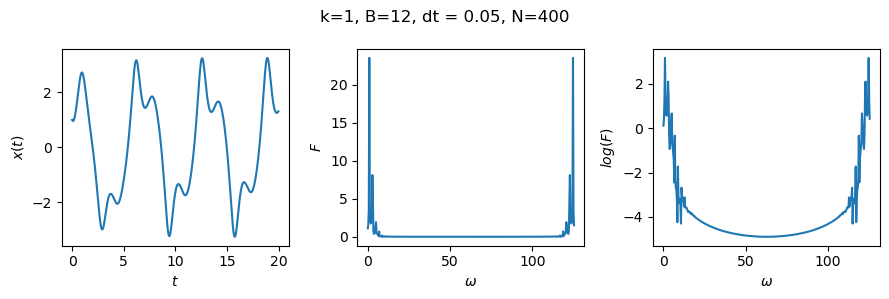

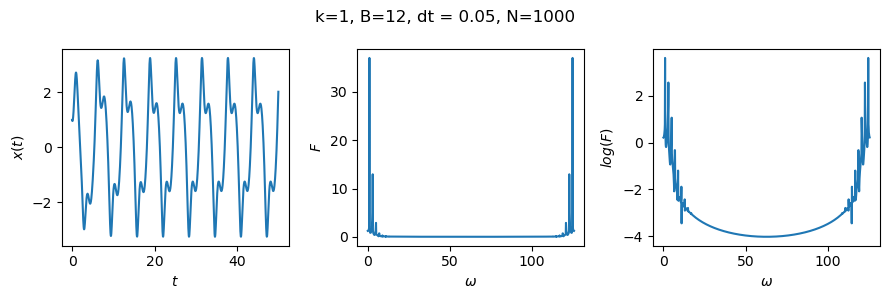

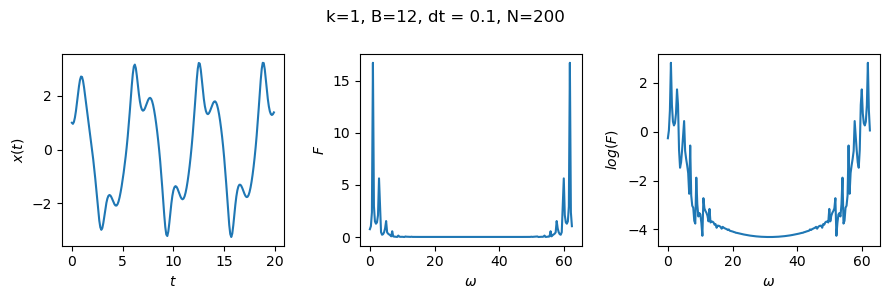

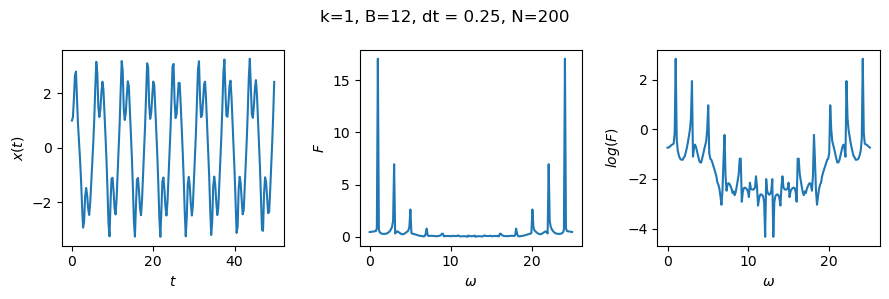

In [101]:
# choice of time step and number of data points
N0 = 200
dt0 = 0.05

for k in k_arr:
    for B in B_arr:
        for N in [2 * N0, 5 * N0]:  # changing N
            dt = dt0
            f = ER(k, B, dt, N)
            F = DFT(f, N)

            t = np.arange(N) * dt
            w = np.arange(N) * (2 * np.pi) / (N * dt)

            fig, axs = plt.subplots(1, 3, figsize=(9,3), dpi=100)
            plt.suptitle('k={:}, B={:}, dt = {:}, N={:}'.format(k, B, dt, N))
            axs[0].plot(t, f)                   # trajectory x(t)
            axs[0].set_xlabel(r'$t$')
            axs[0].set_ylabel(r'$x(t)$')
            axs[1].plot(w, F)                   # linear spectral line
            axs[1].set_xlabel(r'$\omega$')
            axs[1].set_ylabel(r'$F$')
            axs[2].plot(w, np.log(F))           # semi-log spectral line
            axs[2].set_xlabel(r'$\omega$')
            axs[2].set_ylabel(r'$log(F)$')
            plt.tight_layout()
            plt.show()
            
        for dt in [2 * dt0, 5 * dt0]: # changing dt
            N = N0
            f = ER(k, B, dt, N)
            F = DFT(f, N)

            t = np.arange(N) * dt
            w = np.arange(N) * (2 * np.pi) / (N * dt)

            fig, axs = plt.subplots(1, 3, figsize=(9,3), dpi=100)
            plt.suptitle('k={:}, B={:}, dt = {:}, N={:}'.format(k, B, dt, N))
            axs[0].plot(t, f)                   # trajectory x(t)
            axs[0].set_xlabel(r'$t$')
            axs[0].set_ylabel(r'$x(t)$')
            axs[1].plot(w, F)                   # linear spectral line
            axs[1].set_xlabel(r'$\omega$')
            axs[1].set_ylabel(r'$F$')
            axs[2].plot(w, np.log(F))           # semi-log spectral line
            axs[2].set_xlabel(r'$\omega$')
            axs[2].set_ylabel(r'$log(F)$')
            plt.tight_layout()
            plt.show()